# Exercise 7

Georgina Gomes GMSGEO001

# The resource-consumer NP model with odeint

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The code below represents the dynamics
$$\frac{dN}{dt}=-k NP$$
$$\frac{dP}{dt}=k NP$$
The parameter $k$ is an input to the function

In [2]:
# function that returns the right hand side of the above equations
def model(state,t,k):
    N,P = state
    Ndot = -k * N * P
    Pdot =  k * N * P
    return np.array([Ndot,Pdot])

## Question 1: What are the inputs and outputs in the function model? What kind of objects are they?


The function *model* takes variables state, t and k as inputs where
- state contains the initial values of N (nutrient, resource) and P (phytoplankton, consumer) as an array of numbers.
- k is the uptake rate, it's a number.
- t is time, it is an array of numbers representing days, from 0 to the decided max time value, spaced at intervals decided by the user.


The *model* function returns an array of the calculated values for dN/dt and dP/dt.

Set the initial conditions, the time axis and solve the ODE

In [3]:
# initial conditions
K = 0.1
N0 = 5.
P0 = 0.1
state0 = np.array([N0,P0])

# time points (days)
t = np.linspace(0,20,num=100)

# solve ODE using odeint (remember that args is a tuple)
y = odeint(model,state0,t,args=(K,))

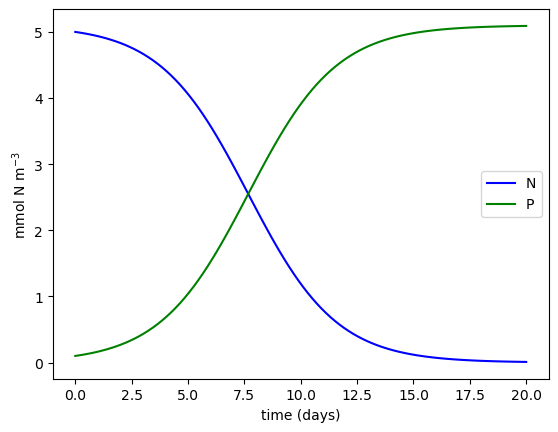

In [4]:
# plot the resulting time series
plt.plot(t,y[:,0],'b',label='N')
plt.plot(t,y[:,1],'g',label='P')
plt.xlabel('time (days)')
plt.ylabel('mmol N m$^{-3}$')
plt.legend()
plt.show()


## 2. Write a new model to simulate the nutrient-phytoplankton-detritus system (NPD).
### Include a detritus variable D that is produced from the mortality of phytoplankton and it is remineralized as a nutrient. This will involve adding 2 new parameters: the mortality rate (phytoplankton lysis) and the remineralization rate.

Dynamics of nutrient-phytoplankton-detritus system (NPD):

$\frac{dP}{dt} = kNP - mP$

$\frac{dN}{dt} = -kNP + rD$

$\frac{dD}{dt} = mP - rD$

where 
- $m$ is the mortality rate of phytoplankton lysis
- $r$ is the remineralization rate of detritus D

## 3. Write the code to solve the new model using odeint and propose some reasonable values for the parameters that lead to a realistic solution

In [5]:
# function that returns the right hand side of NDP equations
def NPDmodel(state,t,k,m,r):
    N,P,D = state
    Pdot =  (k * N * P) - m*P
    Ndot = (-k * N * P) + r*D
    Ddot = m*P - r*D
    return np.array([Ndot,Pdot, Ddot])

In [6]:
# initial conditions
k = 0.1
N0 = 5
P0 = 0.1
D0 = 0.01
m = 0.05
r = 0.05
state0 = np.array([N0,P0, D0])

# time points (days)
T = np.linspace(0,20,num=100)

# solve ODE using odeint
Y = odeint(NPDmodel,state0,t,args=(k,m,r))

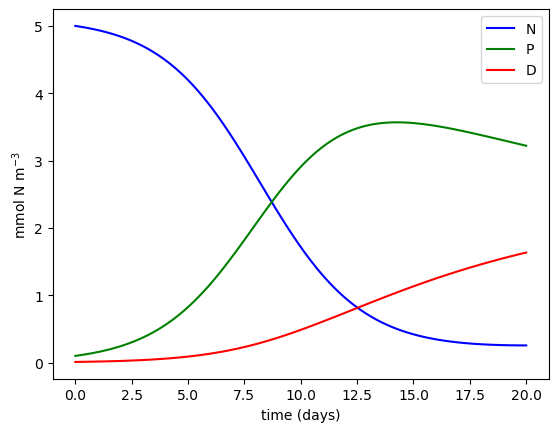

In [7]:
# NPD time series
plt.plot(T,Y[:,0],'b',label='N')
plt.plot(T,Y[:,1],'g',label='P')
plt.plot(T,Y[:,2],'r',label='D')
plt.xlabel('time (days)')
plt.ylabel('mmol N m$^{-3}$')
plt.legend()
plt.show()

For my initial conditions I chose
- initial detritus concentration $D$ to be 10% of the phytoplankton concentration (0.01 mmol N m$^{-3}$)
- mortality rate of phytoplankton lysis $m$ to be 0.05 $d^{-1}$
- remineralization rate of detritus $r$ to be 0.05 $d^{-1}$

I got these values from asking chatGPT what is recommended in the literature. These values I have chosen are recommended for NPD model in coastal shelf waters, and they produce a realistic solution.